<a href="https://colab.research.google.com/github/jetshaggy85/info5731/blob/master/Fellers_selfstudy8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
users = [
{ "id": 0, "name": "Hero" },
{ "id": 1, "name": "Dunn" },
{ "id": 2, "name": "Sue" },
{ "id": 3, "name": "Chi" },
{ "id": 4, "name": "Thor" },
{ "id": 5, "name": "Clive" },
{ "id": 6, "name": "Hicks" },
{ "id": 7, "name": "Devin" },
{ "id": 8, "name": "Kate" },
{ "id": 9, "name": "Klein" }
]

In [0]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [0]:
for user in users:
  user["friends"] = []

In [0]:
for i, j in friendships:
  # this works because users[i] is the user whose id is i
  users[i]["friends"].append(users[j]) # add j as a friend of i
  users[j]["friends"].append(users[i]) # add i as a friend of j

In [0]:
def number_of_friends(user):
  """how many friends does _user_ have?"""
  return len(user["friends"]) # length of friend_ids list

total_connections = sum(number_of_friends(user)
  for user in users) # 24

In [0]:
from __future__ import division # integer division is lame
num_users = len(users) # length of the users list
avg_connections = total_connections / num_users # 2.4

In [0]:
# create a list (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user))
  for user in users]

In [0]:
def friends_of_friend_ids_bad(user):
  # "foaf" is short for "friend of a friend"
  return [foaf["id"]
    for friend in user["friends"] # for each of user's friends
    for foaf in friend["friends"]] # get each of _their_ friends

In [26]:
print(friends_of_friend_ids_bad(users[0])) # Counter({0: 2, 5: 1})

[0, 2, 3, 0, 1, 3]


In [25]:
from collections import Counter # not loaded by default

def not_the_same(user, other_user):
  """two users are not the same if they have different ids"""
  return user["id"] != other_user["id"]

def not_friends(user, other_user):
  """other_user is not a friend if he's not in user["friends"];
  that is, if he's not_the_same as all the people in user["friends"]"""
  return all(not_the_same(friend, other_user)
    for friend in user["friends"])

def friends_of_friend_ids(user):
  return Counter(foaf["id"]
    for friend in user["friends"] # for each of my friends
    for foaf in friend["friends"] # count *their* friends
    if not_the_same(user, foaf) # who aren't me
    and not_friends(user, foaf)) # and aren't my friends

print(friends_of_friend_ids(users[3])) # Counter({0: 2, 5: 1})

Counter({0: 2, 5: 1})


In [0]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [0]:
def data_scientists_who_like(target_interest):
  return [user_id
    for user_id, user_interest in interests
    if user_interest == target_interest]

In [0]:
from collections import defaultdict

# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)

In [0]:
# keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
  interests_by_user_id[user_id].append(interest)

In [0]:
def most_common_interests_with(user):
  return Counter(interested_user_id
    for interest in interests_by_user_id[user["id"]]
    for interested_user_id in user_ids_by_interest[interest]
    if interested_user_id != user["id"])

In [0]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
(48000, 0.7), (76000, 6),
(69000, 6.5), (76000, 7.5),
(60000, 2.5), (83000, 10),
(48000, 1.9), (63000, 4.2)]

In [0]:
# keys are years, values are lists of the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)

# keys are years, each value is average salary for that tenure
average_salary_by_tenure = {
  tenure : sum(salaries) / len(salaries)
  for tenure, salaries in salary_by_tenure.items()
}

In [0]:
def tenure_bucket(tenure):
  if tenure < 2:
    return "less than two"
  elif tenure < 5:
    return "between two and five"
  else:
    return "more than five"

In [0]:
# keys are tenure buckets, values are lists of salaries for that bucket
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  bucket = tenure_bucket(tenure)
  salary_by_tenure_bucket[bucket].append(salary)

In [0]:
# keys are tenure buckets, values are average salary for that bucket
average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [0]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0:
    return "paid"
  elif years_experience < 8.5:
    return "unpaid"
  else:
    return "paid"

In [0]:
words_and_counts = Counter(word
  for user, interest in interests
  for word in interest.lower().split())

In [41]:
for word, count in words_and_counts.most_common():
  if count > 1:
    print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


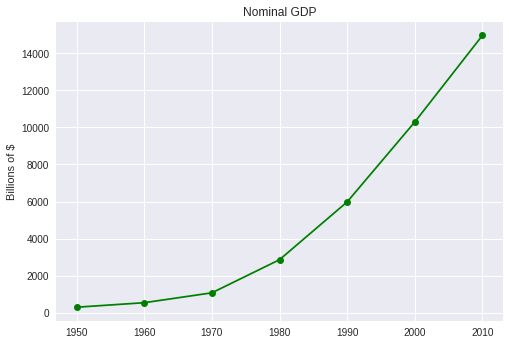

In [42]:
from matplotlib import pyplot as plt
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
# add a title
plt.title("Nominal GDP")
# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

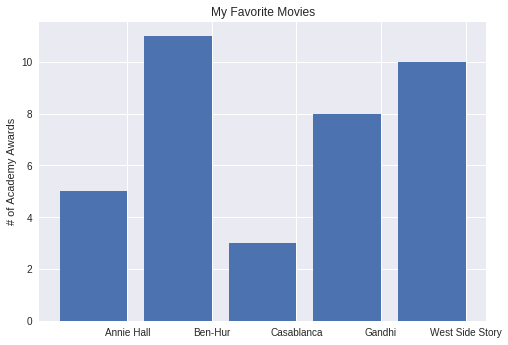

In [43]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# bars are by default width 0.8, so we'll add 0.1 to the left coordinates
# so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]
# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
# label x-axis with movie names at bar centers
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

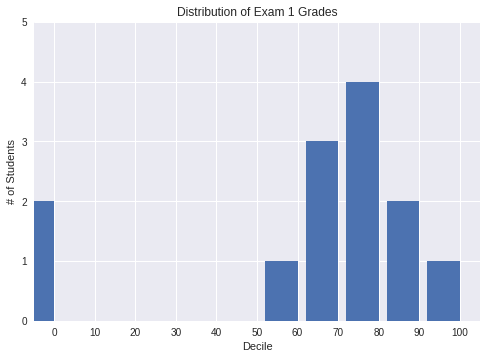

In [44]:
from collections import Counter
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)
plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
histogram.values(), # give each bar its correct height
8) # give each bar a width of 8
plt.axis([-5, 105, 0, 5]) # x-axis from -5 to 105,
# y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)]) # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

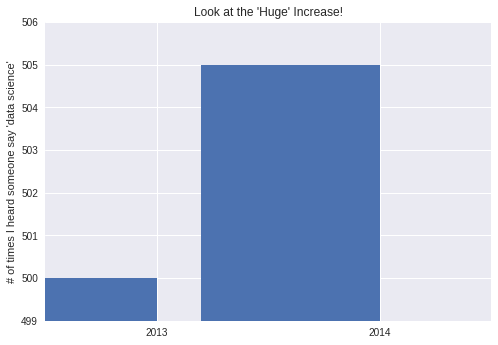

In [45]:
mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)
# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

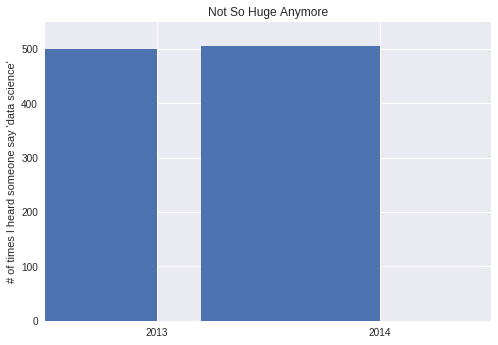

In [47]:
mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)
# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,0,550])
plt.title("Not So Huge Anymore")
plt.show()

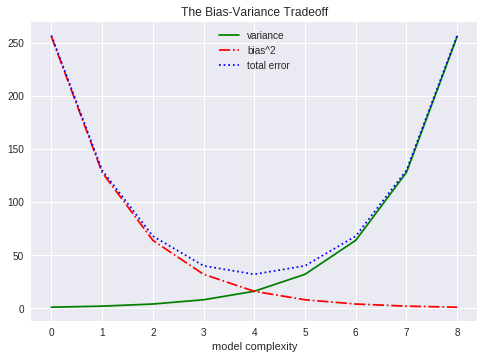

In [48]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]
# we can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance, 'g-', label='variance') # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # red dot-dashed line
plt.plot(xs, total_error, 'b:', label='total error') # blue dotted line
# because we've assigned labels to each series
# we can get a legend for free
# loc=9 means "top center"
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

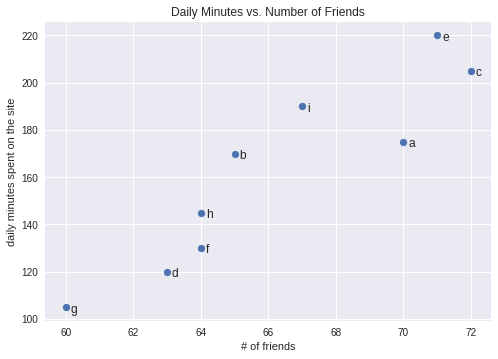

In [50]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
plt.scatter(friends, minutes)
# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
  plt.annotate(label,
    xy=(friend_count, minute_count), # put the label with its point
    xytext=(5, -5), # but slightly offset
    textcoords='offset points')
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

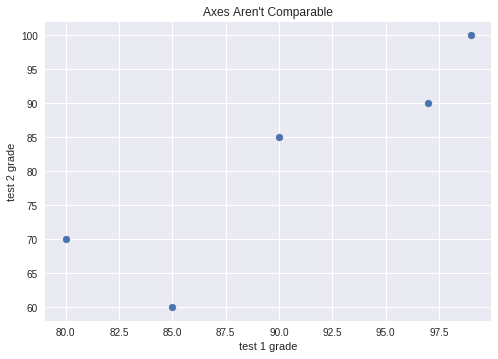

In [51]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

In [0]:
height_weight_age = [70, # inches,
170, # pounds,
40 ] # years
grades = [95, # exam1
80, # exam2
75, # exam3
62 ] # exam4          

In [0]:
def vector_add(v, w):
  """adds corresponding elements"""
  return [v_i + w_i
    for v_i, w_i in zip(v, w)]

In [0]:
def vector_subtract(v, w):
  """subtracts corresponding elements"""
  return [v_i - w_i
    for v_i, w_i in zip(v, w)]

In [0]:
def vector_sum(vectors):
  """sums all corresponding elements"""
  result = vectors[0] # start with the first vector
  for vector in vectors[1:]: # then loop over the others
    result = vector_add(result, vector) # and add them to the result
  return result

In [0]:
def vector_sum(vectors):
  return reduce(vector_add, vectors)

In [0]:
def scalar_multiply(c, v):
  """c is a number, v is a vector"""
  return [c * v_i for v_i in v]

In [0]:
def vector_mean(vectors):
  """compute the vector whose ith element is the mean of the
  ith elements of the input vectors"""
  n = len(vectors)
  return scalar_multiply(1/n, vector_sum(vectors))

In [0]:
def dot(v, w):
  """v_1 * w_1 + ... + v_n * w_n"""
  return sum(v_i * w_i
    for v_i, w_i in zip(v, w))

In [0]:
def sum_of_squares(v):
  """v_1 * v_1 + ... + v_n * v_n"""
  return dot(v, v)

In [0]:
import math
def magnitude(v):
  return math.sqrt(sum_of_squares(v)) # math.sqrt is square root function

In [0]:
def squared_distance(v, w):
  """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
  return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
  return math.sqrt(squared_distance(v, w))

In [0]:
def distance(v, w):
  return magnitude(vector_subtract(v, w))

In [0]:
def shape(A):
  num_rows = len(A)
  num_cols = len(A[0]) if A else 0 # number of elements in first row
  return num_rows, num_cols

In [0]:
def get_row(A, i):
  return A[i] # A[i] is already the ith row

def get_column(A, j):
  return [A_i[j] # jth element of row A_i
    for A_i in A] # for each row A_i

In [0]:
def make_matrix(num_rows, num_cols, entry_fn):
  """returns a num_rows x num_cols matrix
  whose (i,j)th entry is entry_fn(i, j)"""
  return [[entry_fn(i, j) # given i, create a list
    for j in range(num_cols)] # [entry_fn(i, 0), ... ]
    for i in range(num_rows)] # create one list for each i

In [73]:
def is_diagonal(i, j):
  """1's on the 'diagonal', 0's everywhere else"""
  return 1 if i == j else 0
identity_matrix = make_matrix(5, 5, is_diagonal)
identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [0]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [0]:
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
[1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
[1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
[0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
[0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
[0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

In [76]:
friendships[0][2] == 1 # True, 0 and 2 are friends
friendships[0][8] == 1 # False, 0 and 8 are not friends

False

In [0]:
friends_of_five = [i # only need
for i, is_friend in enumerate(friendships[5]) # to look at
if is_friend] # one row

In [0]:
from collections import Counter, defaultdict
from functools import partial, reduce
#from linear_algebra import shape, get_row, get_column, make_matrix, \
#    vector_mean, vector_sum, dot, magnitude, vector_subtract, scalar_multiply
#from stats import correlation, standard_deviation, mean
#from probability import inverse_normal_cdf
#from gradient_descent import maximize_batch
import math, random, csv
import matplotlib.pyplot as plt
import dateutil.parser
from scipy.stats import norm
import numpy as np

In [0]:
def bucketize(point, bucket_size):
  """floor the point to the next lower multiple of bucket_size"""
  return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
  """buckets the points and counts how many in each bucket"""
  return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
  histogram = make_histogram(points, bucket_size)
  plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
  plt.title(title)
  plt.show()

In [0]:
def random_normal():
  """returns a random draw from a standard normal distribution"""
  return norm.cdf(random.random())
xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

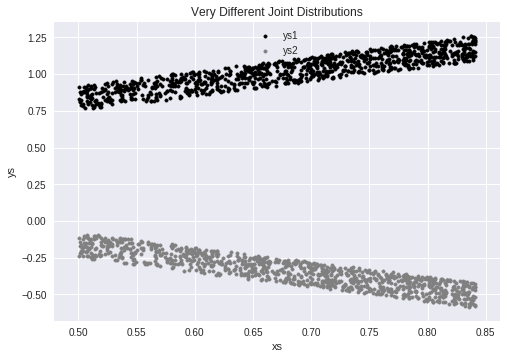

In [93]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [98]:
print(np.corrcoef(xs, ys1)) # 0.9
print(np.corrcoef(xs, ys2)) # -0.9

[[1.        0.8936297]
 [0.8936297 1.       ]]
[[ 1.         -0.89258827]
 [-0.89258827  1.        ]]


In [0]:
def correlation_matrix(data):
  """returns the num_columns x num_columns matrix whose (i, j)th entry
  is the correlation between columns i and j of data"""

  _, num_columns = shape(data)

  def matrix_entry(i, j):
    return np.corrcoef(get_column(data, i), get_column(data, j))

  return make_matrix(num_columns, num_columns, matrix_entry)

NameError: ignored